In [30]:
import gym
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = A2C.load("../a2c/model/lunarlander_v2_a2c_3M_to_11M")

In [31]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(gym.make('LunarLander-v2')), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 230.98 +/- 83.86


In [32]:
# Create adversary with adversary env
# adversary_env = AdversaryEnv("LunarLander-v2", target_model)
# adversary = PPO(MlpPolicy, adversary_env, verbose=1)

In [33]:
# Train adversary
# log_dir = "./out/training-log/"
# log_path = log_dir + f"adversary-lunarlander-v2/"
# save_dir = "./models/adversary-lunarlander-v2/"

# timesteps = 50000

# adversary.learn(
#         total_timesteps=timesteps,
#         callback=None,
#         log_interval=-1,
#         eval_env=adversary_env, 
#         eval_freq=5000, 
#         n_eval_episodes=100,
#         tb_log_name='PPO',
#         eval_log_path=log_path, 
#         reset_num_timesteps=False
#         )

# # Save adversary
# adversary.save(save_dir + f"adversary_lunarlander_v2_{timesteps}")

In [34]:
# Load adversary
save_dir = "./models/adversary-lunarlander-v2/"

adversary = PPO.load(save_dir + f"adversary_lunarlander_v2_50000")
adversary_env = AdversaryEnv('LunarLander-v2', target_model)

In [35]:
import numpy as np
import pandas as pd
from uniform_attack import UniformAttack

# Evaluate uniform adversarial attack over different epsilon
data_dict = {
    'epsilon': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(1, 50):
    epsilon = j/100

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = gym.make("LunarLander-v2")
        ua = UniformAttack(env=env, model=target_model, attack=adversary, epsilon=epsilon)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['epsilon'].append(epsilon)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"Epsilon {data_dict['epsilon'][-1]}: \n \
        {data_dict['mean_rew'][-1]} mean rew, \n \
        {data_dict['mean_perturbation'][-1]} mean perturbation \n \
        {data_dict['mean_n_timesteps'][-1]} mean n timesteps \n \
        {data_dict['mean_n_attacks'][-1]} mean n attacks"
        )
    print("------------------------------------------")

------------------------------------------
Epsilon 0.01: 
         202.68 mean rew, 
         2.8399999141693115 mean perturbation 
         323.56 mean n timesteps 
         323.56 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.02: 
         138.12 mean rew, 
         7.239999771118164 mean perturbation 
         405.08 mean n timesteps 
         405.08 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.03: 
         81.66 mean rew, 
         9.770000457763672 mean perturbation 
         363.4 mean n timesteps 
         363.4 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.04: 
         61.26 mean rew, 
         10.609999656677246 mean perturbation 
         294.26 mean n timesteps 
         294.26 mean n attacks
------------------------------------------
------------------------------------------
Eps

In [39]:
print(data_dict)

{'epsilon': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49], 'mean_rew': [202.68, 138.12, 81.66, 61.26, 45.21, 33.99, 23.34, 16.85, 16.43, 10.6, 1.12, 4.64, -4.74, -12.08, -5.66, -20.3, -25.96, -24.01, -32.12, -33.63, -50.21, -49.47, -53.62, -63.34, -61.16, -76.12, -60.19, -72.74, -94.96, -93.63, -113.48, -101.88, -129.49, -125.68, -124.23, -117.54, -160.44, -152.87, -173.91, -176.18, -192.91, -185.29, -213.56, -195.38, -221.11, -226.77, -251.36, -236.98, -235.77], 'mean_perturbation': [2.84, 7.24, 9.77, 10.61, 9.91, 7.91, 7.91, 7.75, 8.88, 9.44, 9.79, 11.17, 11.29, 12.4, 13.0, 13.97, 14.22, 15.85, 15.57, 16.86, 17.59, 18.16, 19.46, 19.95, 21.44, 20.93, 21.57, 23.14, 23.51, 23.91, 25.26, 26.66, 29.34, 27.29, 28.67, 29.96, 30.94, 32.79, 32.38, 32.6

In [37]:
# Create DataFrame
labels = ['epsilon', 'mean_rew', 'mean_perturbation', 'mean_n_timsteps', 'mean_n_attacks']

data_df = pd.DataFrame(
        data_dict, 
        columns=labels,
        )
data_df.set_index('epsilon', inplace=True)

# Save data as .csv file
with open("./out/data/" + "uniform_attack_epsilon", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timsteps,mean_n_attacks
epsilon,,,,
0.01,202.68,2.840000,NaN,323.56
0.02,138.12,7.240000,NaN,405.08
0.03,81.66,9.770000,NaN,363.40
0.04,61.26,10.610000,NaN,294.26
0.05,45.21,9.910000,NaN,222.58
0.06,33.99,7.910000,NaN,146.38
0.07,23.34,7.910000,NaN,124.98
0.08,16.85,7.750000,NaN,106.26
0.09,16.43,8.880000,NaN,109.12


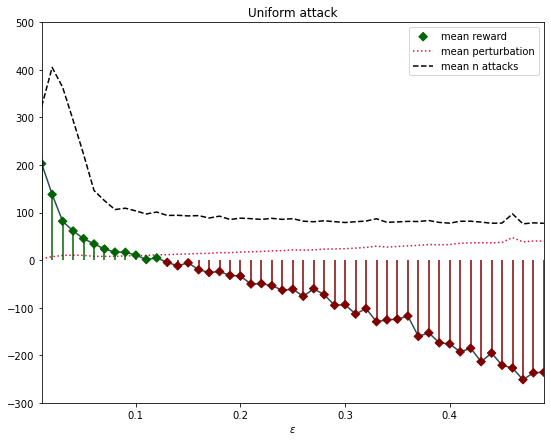

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data
with open("./out/data/" + "uniform_attack_epsilon", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
plt.figure(figsize=(9,7))
plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dotted', alpha=1, zorder=0)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Uniform attack")
plt.legend()
plt.xlabel('$\epsilon$')
# plt.ylabel()
plt.axis([0.01, 0.49, -300, 500]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()